/home/amit/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


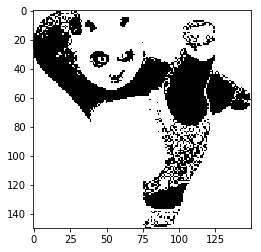

In [9]:
from scipy.io import wavfile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import floor
import pywt
import wave

sqr_size=150; #Higher the pixels, more the clarity

#Reading the audio file
[fs,read_data]=wavfile.read('audio.wav');
data=read_data[:,0]; 
data_copy=data;
#Both left and right ear, we take just left.

#Repeating the thing 8 times, to get a seq of large len
while (300*sqr_size*sqr_size > len(data)):
	data=np.concatenate((data,data_copy));

wavfile.write('rep_signal.wav',fs,data);
#Opening the image
img=Image.open('kf_panda.bmp','r');
img=img.resize((sqr_size,sqr_size)) #Resizing

#Flattening out the img matrix
pix_val=list(img.getdata());
pix_val=[sets[0] for sets in pix_val]; #Just taking the 1st(/3) number

pix_val=np.array(pix_val);
a=pix_val>127; #Bitmap
a=a*1;

#All transforms will be done here.
#reps_signal=floor(len(data)/262);
new_data=data;

for k in range(sqr_size*sqr_size):
	temp_signal=new_data[k*262:(k+1)*262];
	cA1,cD1=pywt.dwt(temp_signal,'db4');
	cA2,cD2=pywt.dwt(cA1,'db4');
	cA3,cD3=pywt.dwt(cA2,'db4');
	cA4,cD4=pywt.dwt(cA3,'db4');
	cA5,cD5=pywt.dwt(cA4,'db4');
	m=np.mean(cD5);
	en=np.sum(cD3*cD3/5);
	cD3=cD3-np.mean(cD3);
	if(a[k]==0):
		cD3=cD3-500;
	else:
		cD3=cD3+500;
	r=pywt.idwt(cA5,cD5,'db4');
	r=pywt.idwt(r,cD4,'db4');
	r=pywt.idwt(r,cD3,'db4');
	r=pywt.idwt(r,cD2,'db4');
	r=pywt.idwt(r,cD1,'db4');
	new_data[k*262:(k+1)*262]=r;

#Creating the modified signal
wavfile.write('after_transforms.wav',fs,new_data);

#Making the image back from signal
[fs,read_data]=wavfile.read('after_transforms.wav');
#data=read_data[:,0]; 
a1=a;
for k in range(sqr_size*sqr_size):
	temp_signal=data[k*262:(k+1)*262];
	cA1,cD1=pywt.dwt(temp_signal,'db4');
	cA2,cD2=pywt.dwt(cA1,'db4');
	cA3,cD3=pywt.dwt(cA2,'db4');
	cA4,cD4=pywt.dwt(cA3,'db4');
	cA5,cD5=pywt.dwt(cA4,'db4');
	if(np.mean(cD3)<0):
		a1[k]=0;
	else:
		a1[k]=1;

#Displaying the Image, a is 45*45 X 1 vector
a1=a1.reshape((sqr_size,sqr_size));
plt.imshow(a1,'gray');
plt.show();
result = Image.fromarray((a1 * 255).astype(np.uint8))
result.save('retreived.bmp');
#Displaying the original image
# a=a.reshape((sqr_size,sqr_size));
# plt.imshow(a,'gray');
# plt.show();


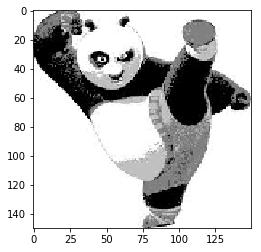

In [6]:
plt.imshow(img,'gray');
plt.show();